<a href="https://colab.research.google.com/github/Gasijiyo/FirstStep_Python/blob/master/py26_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   [apt_201910.csv](https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

# Colab에 한글 폰트 설치하기

In [1]:
# https://teddylee777.github.io/colab/colab-korean 참조
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# succeeded 후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,117 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 나눔고딕폰트 설정 
plt.rc('font', family='NanumBarunGothic')
# 시각화 시 한글 폰트 깨짐 테스트했으나 실패
# import matplotlib.font_manager as fm
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [2]:
file_path = 'https://raw.githubusercontent.com/JakeOh/202110_itw_lab_python/main/apt_201910.csv'

파일 인코딩 타입

* utf-8: Linux, MacOS 등 대부분의 OS에서 텍스트의 기본 인코딩
* cp949: 한글 MS-Windows에서 텍스트의 기본 인코딩
* cp1252: 영문 MS-Windows에서 텍스트의 기본 인코딩

In [3]:
# encoding 설정, 가격 타입 변경(콤마 설정)
# *참고* 타입 변환: apt.astype({'가격' : 'int'})
apt = pd.read_csv(file_path, encoding='cp949', engine='python', thousands=',')
# 데이터프레임 확인
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22
...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32


In [4]:
# 데이터 정보 확인(인덱스, 데이터타입 등)
apt.info()
# 8 가격 ... int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [5]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [6]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


# 기술 통계량 시각화

In [7]:
apt[['면적','가격','층','건축년도']].describe()

,면적,가격,층,건축년도
count,42758.000000,42758.000000,42758.000000,42758.000000
mean,75.990614,31719.163946,9.614575,2002.652252
std,24.816118,26001.893045,6.582509,9.716009
min,10.020000,600.000000,-1.000000,1962.000000
25%,59.820000,15500.000000,4.000000,1995.000000
50%,82.536900,25400.000000,9.000000,2003.000000
75%,84.961200,40000.000000,13.000000,2011.000000
max,291.336000,485000.000000,70.000000,2019.000000


# 기술 통계량 시각화

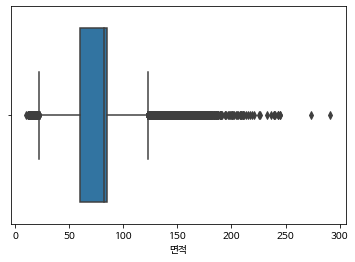

In [8]:
# 아파트 면적 시각화
sns.boxplot(x='면적', data=apt)
plt.show()

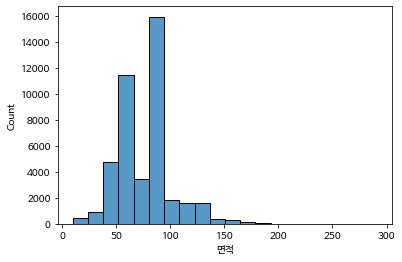

In [9]:
sns.histplot(x='면적', data=apt, bins=20)
plt.show()

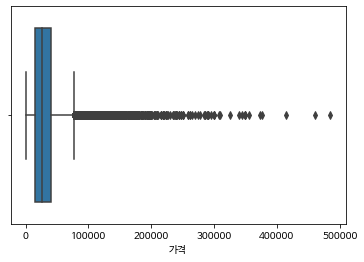

In [10]:
# 아파트 가격 시각화
sns.boxplot(x='가격', data=apt)
plt.show()

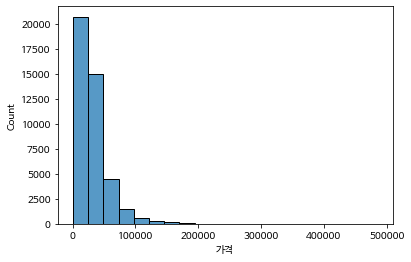

In [11]:
sns.histplot(x='가격', data=apt, bins=20)
plt.show()

In [12]:
# '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦
province = []
for p in apt['시군구']: 
    add = p.find(' ')   # 주소의 첫번째 공백까지 
    province.append(p[:add])    #  slicing

In [13]:
# 선생님:
# apt['province'] = apt['시군구'].str.split().str[0]
# apt['province'].unique()
# apt['province'].value_counts()

In [14]:
len(province)   # 시/도 개수 확인

42758

In [15]:
# value_counts 출력
province_counts = pd.value_counts(province)
province_count_df = province_counts.reset_index()
province_count_df.columns = ['province','counts']
province_count_df

,province,counts
0,경기도,12126
1,서울특별시,4701
2,경상남도,2955
3,인천광역시,2761
4,부산광역시,2752
5,대전광역시,2487
6,충청남도,2045
7,경상북도,1985
8,대구광역시,1969
9,광주광역시,1588


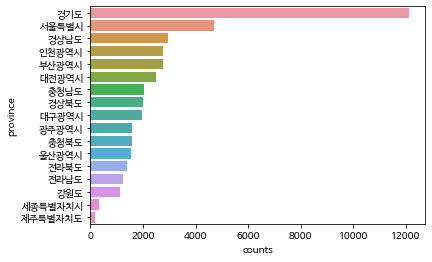

In [16]:
sns.barplot(x='counts',y='province', data=province_count_df)
plt.show()

In [17]:
# 연산 편하게 기존 apt에 추가.
# 하면 안되지만 해봤습니다.
apt.insert(1, '시/도명', province)
apt
# apt.drop(['시/도'], axis=1)
# apt

,시군구,시/도명,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,강원도,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,강원도,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,강원도,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,강원도,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,강원도,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,충청북도,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,충청북도,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,충청북도,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,충청북도,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32


In [18]:
# 계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦
year = []
month = []
for d in apt['계약년월']:
    strd = str(d)   # int to string
    year.append(strd[:4])
    month.append(strd[-2:])

In [19]:
# 계약년도
year_counts = pd.value_counts(year)
year_counts
# 선생님:
# apt['year'] = apt['게약년월'] // 100    #> = 2019, 몫
# apt['month'] = apt['계약년월'] % 100    #> = 10, 나머지 

2019    42758
dtype: int64

In [20]:
# 계약월
month_counts = pd.value_counts(month)
month_counts

10    42758
dtype: int64

In [21]:
# 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
# 서울 동 데이터 추출
address = []
dong = []
# 서울시 주소 추출
apt_seoul=apt[apt['시군구'].str.contains('서울')]
for data in apt_seoul['시군구']:
    datasplit = data.split()    
    address.extend(datasplit)
# 주소 중 '~동'만 추출
for n in range(2,len(address),3):
    dong.append(address[n])
dong

['개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '개포동',
 '논현동',
 '논현동',
 '논현동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '삼성동',
 '삼성동',
 '삼성동',
 '삼성동',
 '삼성동',
 '삼성동',
 '삼성동',
 '세곡동',
 '세곡동',
 '세곡동',
 '세곡동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '신사동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '압구정동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동',
 '역삼동'

In [22]:
# 선생님:
# 광역시도는 위에서 했으니 pass
# 시,군
apt['county'] = apt['시군구'].str.split().str[1]
apt['county'].unique()
# 동
apt['dong'] = apt['시군구'].str.split().str[2]
apt['dong'].unique()

array(['견소동', '교동', '남문동', ..., '지현동', '칠금동', '호암동'], dtype=object)

In [23]:
# 서울데이터에 동명추가. 
apt_seoul.insert(1,'동명', dong)
apt_seoul

,시군구,동명,시/도명,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
27005,서울특별시 강남구 개포동,개포동,서울특별시,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310
27006,서울특별시 강남구 개포동,개포동,서울특별시,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310
27007,서울특별시 강남구 개포동,개포동,서울특별시,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310
27008,서울특별시 강남구 개포동,개포동,서울특별시,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310
27009,서울특별시 강남구 개포동,개포동,서울특별시,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,중화동,서울특별시,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88
31702,서울특별시 중랑구 중화동,중화동,서울특별시,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30
31703,서울특별시 중랑구 중화동,중화동,서울특별시,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752
31704,서울특별시 중랑구 중화동,중화동,서울특별시,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752


In [24]:
# 서울시 동별 가격의 개수 
dong_counts = pd.value_counts(dong)
dong_counts

상계동       198
구로동       120
중계동       108
시흥동       101
봉천동        97
         ... 
홍익동         1
명륜2가        1
명륜3가        1
영등포동2가      1
신설동         1
Length: 247, dtype: int64

In [25]:
# 서울시 동별 가격의 평균 (내림차순)
apt_seoul_mean = apt_seoul.groupby(by='동명')['가격'].mean().sort_values(ascending=False)
apt_seoul_mean

동명
압구정동      263250.000000
반포동       224200.000000
잠원동       194313.333333
대치동       192795.454545
잠실동       191459.090909
              ...      
연건동        21900.000000
당산동6가      17375.000000
영등포동1가     12083.333333
영등포동3가     11800.000000
장충동2가       8835.000000
Name: 가격, Length: 247, dtype: float64

In [26]:
# 서울시 동별 가격의 최소값 (오름차순)
apt_seoul_min = apt_seoul.groupby(by='동명')['가격'].min().sort_values()
apt_seoul_min

동명
공릉동        8500
신당동        8500
장충동2가      8835
길동         9000
시흥동        9000
          ...  
잠실동      145000
평동       152500
홍파동      159000
압구정동     170000
한강로3가    175000
Name: 가격, Length: 247, dtype: int64

In [27]:
# 서울시 동별 가격의 최대값 (내림차순)
apt_seoul_max = apt_seoul.groupby(by='동명')['가격'].max().sort_values(ascending=False)
apt_seoul_max

동명
한남동       485000
도곡동       461000
반포동       415000
대치동       373000
압구정동      355000
           ...  
창천동        21900
당산동6가      17400
영등포동1가     13200
영등포동3가     12000
장충동2가       8835
Name: 가격, Length: 247, dtype: int64

In [28]:
# 도/광역시별 아파트 가격의 개수, 평균, 최솟값, 최댓값
# 도/광역시별 아파트 가격의 개수
apt_price_count = apt.groupby(by='시/도명')['가격'].count()
apt_price_count

# 선생님:
result = apt.groupby(by='시/도명')['가격'].agg(['count', 'mean', 'max', 'min'])
result

,count,mean,max,min
시/도명,,,,
강원도,1143,14305.559930,45800,950
경기도,12126,36447.593765,262000,2700
경상남도,2955,20157.054484,83200,2700
경상북도,1985,15304.175819,50000,600
광주광역시,1588,21786.904282,115000,4150
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
부산광역시,2752,29593.587209,376640,1500
서울특별시,4701,69302.919166,485000,8500


In [29]:
# 도/광역시별 아파트 가격의 평균
apt_price_mean = apt.groupby(by='시/도명')['가격'].mean()
apt_price_mean

# 선생님:
top10 = result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,max,min
시/도명,,,,
서울특별시,4701,69302.919166,485000,8500
경기도,12126,36447.593765,262000,2700
세종특별자치시,315,33577.206349,82200,2880
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
울산광역시,1562,26581.768246,81000,4000
제주특별자치도,165,25878.181818,76500,6000


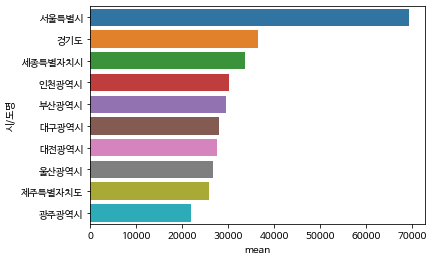

In [30]:
sns.barplot(x='mean', y=top10.index, data=top10)
plt.show()

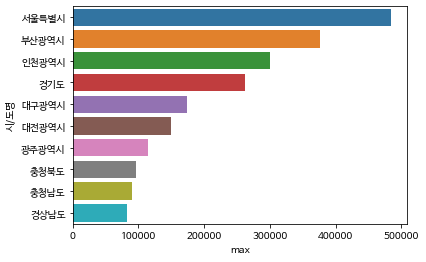

In [31]:
# 도/광역시별 아파트 가격의 최대, 최소값
apt_price_max = apt.groupby(by='시/도명')['가격'].max()
apt_price_max

# 선생님:
top10 = result.sort_values(by='max', ascending=False).head(n=10)
sns.barplot(x='max', y=top10.index, data=top10)
plt.show()

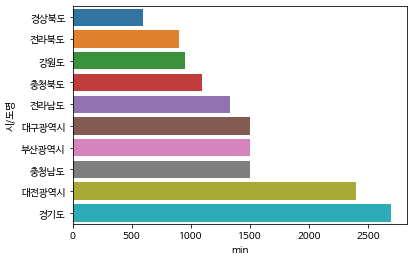

In [32]:
## 도/광역시별 아파트 가격의 최소값
apt_price_min = apt.groupby(by='시/도명')['가격'].min()
apt_price_min

# 선생님:
bottom10 = result.sort_values(by='min').head(n=10)
sns.barplot(x='min', y=bottom10.index, data=bottom10)
plt.show()

# 면적이 $84m^2$ 이상 $100m^2$ 미만인 아파트 거래가격 분석

In [33]:
# 면적이 84m^2 이상 100m^2 미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값

# 해당 면적 아파트 데이터 추출
apt_84_100 = apt[(apt['면적']>=84.0) & (apt['면적']<100.0)]
apt_84_100
# 위의 데이터 중 서울아파트 추출
apt_84_100_seoul = apt_84_100[apt_84_100['시/도명'].str.contains('서울')]
apt_84_100_seoul

,시군구,시/도명,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong
27027,서울특별시 강남구 논현동,서울특별시,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,강남구,논현동
27030,서울특별시 강남구 대치동,서울특별시,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,강남구,대치동
27033,서울특별시 강남구 대치동,서울특별시,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,강남구,대치동
27037,서울특별시 강남구 대치동,서울특별시,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,강남구,대치동
27038,서울특별시 강남구 대치동,서울특별시,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,강남구,대치동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,서울특별시,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,중랑구,신내동
31692,서울특별시 중랑구 신내동,서울특별시,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,중랑구,신내동
31693,서울특별시 중랑구 신내동,서울특별시,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,중랑구,신내동
31694,서울특별시 중랑구 신내동,서울특별시,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,중랑구,신내동


In [34]:
address1 = []
dong1 = []
# 서울시 주소 추출
for add in apt_84_100_seoul['시군구']:
    datasplit = add.split()   
    address1.extend(datasplit)
# # 주소 중 '~동'만 추출
for n in range(2,len(address1),3):
    dong1.append(address1[n])
dong1

['논현동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '대치동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '도곡동',
 '삼성동',
 '삼성동',
 '세곡동',
 '세곡동',
 '세곡동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '수서동',
 '역삼동',
 '역삼동',
 '역삼동',
 '일원동',
 '자곡동',
 '청담동',
 '청담동',
 '청담동',
 '청담동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '강일동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '고덕동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '길동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '둔촌동',
 '명일동',
 '명일동',
 '명일동',
 '명일동',
 '명일동',
 '명일동',
 '상일동',
 '상일동',
 '상일동',
 '상일동',
 '상일동',
 '상일동',
 '상일동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '성내동',
 '암사동',
 '암사동',
 '암사동',
 '암사동',
 '암사동',
 '암

In [35]:
# 추출한 서울시 데이터에 '동명' 컬럼 추가
apt_84_100_seoul.insert(1,'동명',dong1)
apt_84_100_seoul

,시군구,동명,시/도명,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,county,dong
27027,서울특별시 강남구 논현동,논현동,서울특별시,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,강남구,논현동
27030,서울특별시 강남구 대치동,대치동,서울특별시,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,강남구,대치동
27033,서울특별시 강남구 대치동,대치동,서울특별시,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,강남구,대치동
27037,서울특별시 강남구 대치동,대치동,서울특별시,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,강남구,대치동
27038,서울특별시 강남구 대치동,대치동,서울특별시,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,강남구,대치동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,신내동,서울특별시,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,중랑구,신내동
31692,서울특별시 중랑구 신내동,신내동,서울특별시,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,중랑구,신내동
31693,서울특별시 중랑구 신내동,신내동,서울특별시,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,중랑구,신내동
31694,서울특별시 중랑구 신내동,신내동,서울특별시,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,중랑구,신내동


In [36]:
# 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
dong1_count = pd.value_counts(dong1)
dong1_count

구로동      35
봉천동      31
상도동      29
목동       26
중계동      24
         ..
동작동       1
원효로1가     1
응봉동       1
한남동       1
논현동       1
Length: 193, dtype: int64

In [37]:
# 동별 아파트 가격 평균 (내림차순)
apt_84_100_seoul_mean = apt_84_100_seoul.groupby(by='동명')['가격'].mean().sort_values(ascending=False)
apt_84_100_seoul_mean

동명
반포동     244833.333333
대치동     207000.000000
잠원동     195275.000000
삼성동     188500.000000
서빙고동    183000.000000
            ...      
궁동       43000.000000
도봉동      41895.454545
구산동      40200.000000
방학동      39014.285714
쌍문동      38142.857143
Name: 가격, Length: 193, dtype: float64

In [38]:
# 동별 아파트 가격 최소값(오름차순)
apt_84_100_seoul_min = apt_84_100_seoul.groupby(by='동명')['가격'].max().sort_values()
apt_84_100_seoul_min

동명
궁동      43000
구산동     43300
항동      44000
우이동     45200
방학동     48000
        ...  
잠실동    195000
삼성동    259000
대치동    277000
잠원동    285000
반포동    340000
Name: 가격, Length: 193, dtype: int64

In [39]:
# 동별 아파트 가격 최대값 (내림차순)
apt_84_100_seoul_max = apt_84_100_seoul.groupby(by='동명')['가격'].max().sort_values(ascending=False)
apt_84_100_seoul_max

동명
반포동    340000
잠원동    285000
대치동    277000
삼성동    259000
잠실동    195000
        ...  
방학동     48000
우이동     45200
항동      44000
구산동     43300
궁동      43000
Name: 가격, Length: 193, dtype: int64

In [40]:
# 면적이 84m^2 이상 100m^2 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
# 가격 개수
apt_84_100.groupby(by='시/도명')['가격'].count()

시/도명
강원도         393
경기도        4659
경상남도       1171
경상북도        731
광주광역시       612
대구광역시       758
대전광역시      1066
부산광역시       886
서울특별시      1511
세종특별자치시     156
울산광역시       657
인천광역시       922
전라남도        394
전라북도        508
제주특별자치도      56
충청남도        725
충청북도        499
Name: 가격, dtype: int64

In [41]:
# 가격 평균 내림차순
apt_84_100.groupby(by='시/도명')['가격'].mean().sort_values(ascending=False)

시/도명
서울특별시      79348.775645
경기도        39507.718395
세종특별자치시    38979.487179
부산광역시      36020.182844
인천광역시      34813.131236
대구광역시      33837.645119
제주특별자치도    33226.785714
울산광역시      31650.003044
대전광역시      30905.909944
광주광역시      28226.101307
경상남도       24684.422716
충청남도       23877.680000
충청북도       21989.987976
경상북도       20489.586867
전라남도       20069.162437
강원도        19480.854962
전라북도       19120.515748
Name: 가격, dtype: float64

In [42]:
# 최소값 오름차순
apt_84_100.groupby(by='시/도명')['가격'].min().sort_values()

시/도명
전라남도        2950
경상북도        4500
전라북도        5000
강원도         5200
경상남도        5800
경기도         7000
충청남도        7400
대전광역시       7500
충청북도        7800
울산광역시       9000
부산광역시       9800
세종특별자치시    10000
인천광역시      10100
광주광역시      11500
대구광역시      11800
제주특별자치도    15800
서울특별시      27500
Name: 가격, dtype: int64

In [43]:
# 최대값 내림차순
apt_84_100.groupby(by='시/도명')['가격'].max().sort_values(ascending=False)

시/도명
서울특별시      340000
경기도        165000
대구광역시       91000
대전광역시       89500
인천광역시       85500
부산광역시       85000
제주특별자치도     75000
세종특별자치시     74000
광주광역시       70500
경상남도        69400
충청남도        67200
울산광역시       65000
경상북도        47250
강원도         45800
충청북도        43000
전라남도        40400
전라북도        37300
Name: 가격, dtype: int64